In [32]:
from functions import *

In [47]:
y_code = np.asarray(encoder_frase("mi mama me mima"), )
y_org = np.asarray(num_tranform("mi mama me mima"))

print((np.sum(y_code**2))**.5)
print((np.sum(y_org**2))**.5)
print(np.dot(y_org, y_code))
print((y_code - y_org)%28)

print(tranform_palabras("mi mama me mima"))
(y_code-10)%28

57.445626465380286
56.52433104425032
2096
[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
{'a': 3, 'b': 0, 'c': 0, 'd': 0, 'e': 1, 'f': 0, 'g': 0, 'h': 0, 'i': 2, 'j': 0, 'k': 0, 'l': 0, 'm': 6, 'n': 0, 'ñ': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0, ' ': 3}


array([23, 19, 10, 23, 11, 23, 11, 10, 23, 15, 10, 23, 19, 23, 11],
      dtype=int32)

In [7]:
frases = scrapping()

correct_pandas = []

for frase in frases:
    correct_pandas.append(tranform_palabras(frase))

y_correct = np.ones(len(correct_pandas))

incorrect_pandas = []

for frase in frases:
    incorrect_pandas.append(tranform_palabras(num2char_transform(encoder_frase(frase))))
        
y_incorrect = np.zeros(len(incorrect_pandas))

In [27]:
X_correct = pd.DataFrame(correct_pandas).iloc[:,:27]
y_correct = pd.DataFrame(y_correct)
X_incorrect = pd.DataFrame(incorrect_pandas).iloc[:,:27]
y_incorrect = pd.DataFrame(y_incorrect)
X = pd.concat([X_correct,X_incorrect])
minimo = X.min()
maximo = X.max()
X = (X-X.min())/(X.max()-X.min())
y = pd.concat([y_correct,y_incorrect])

Data = pd.concat([X,y], axis = 1)
Data

                 

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,0
0,0.021277,0.076923,0.076923,0.117647,0.000000,0.000000,0.000000,0.000000,0.090909,0.0000,...,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.000000,0.000,0.000000,1.0
1,1.000000,0.307692,1.000000,0.941176,1.000000,0.176471,0.222222,0.052632,1.000000,0.0000,...,1.000000,0.327869,0.276596,1.000000,0.178571,0.0,0.027778,0.250,0.142857,1.0
2,0.170213,0.000000,0.384615,0.117647,0.277778,0.058824,0.000000,0.000000,0.090909,0.0000,...,0.277778,0.147541,0.106383,0.363636,0.000000,0.0,0.000000,0.125,0.000000,1.0
3,0.319149,0.153846,0.076923,0.294118,0.333333,0.000000,0.111111,0.052632,0.318182,0.0000,...,0.333333,0.262295,0.170213,0.363636,0.071429,0.0,0.027778,0.125,0.000000,1.0
4,0.297872,0.000000,0.384615,0.117647,0.333333,0.058824,0.111111,0.000000,0.136364,0.0000,...,0.333333,0.229508,0.148936,0.454545,0.000000,0.0,0.000000,0.125,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.000000,0.000000,0.153846,0.117647,0.000000,0.117647,0.000000,0.000000,0.045455,0.0000,...,0.111111,0.016393,0.000000,0.090909,0.000000,0.0,0.027778,0.125,0.142857,0.0
290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.027778,0.000,0.142857,0.0
291,0.021277,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.0625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250,0.142857,0.0
292,0.297872,0.153846,0.538462,0.235294,0.444444,0.117647,0.111111,0.000000,0.409091,0.0625,...,0.611111,0.262295,0.085106,0.636364,0.000000,0.0,0.000000,0.250,0.000000,0.0


In [20]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

clf = tree.DecisionTreeClassifier(max_depth = 6)
clf = clf.fit(X_train, y_train)


[Text(199.5923076923077, 201.90857142857143, 'X[4] <= 0.042\ngini = 0.499\nsamples = 393\nvalue = [205, 188]'),
 Text(115.8923076923077, 170.84571428571428, 'X[24] <= 0.014\ngini = 0.332\nsamples = 200\nvalue = [158, 42]'),
 Text(103.01538461538462, 139.78285714285715, 'X[17] <= 0.025\ngini = 0.453\nsamples = 121\nvalue = [79, 42]'),
 Text(64.38461538461539, 108.72, 'X[23] <= 0.018\ngini = 0.498\nsamples = 75\nvalue = [35, 40]'),
 Text(51.50769230769231, 77.65714285714284, 'X[14] <= 0.038\ngini = 0.444\nsamples = 60\nvalue = [20, 40]'),
 Text(25.753846153846155, 46.59428571428572, 'X[7] <= 0.105\ngini = 0.343\nsamples = 50\nvalue = [11, 39]'),
 Text(12.876923076923077, 15.531428571428563, 'gini = 0.282\nsamples = 47\nvalue = [8, 39]'),
 Text(38.63076923076923, 15.531428571428563, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(77.26153846153846, 46.59428571428572, 'X[19] <= 0.041\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(64.38461538461539, 15.531428571428563, 'gini = 0.0\ns

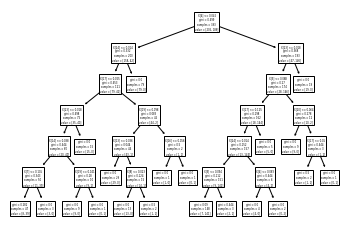

In [21]:
tree.plot_tree(clf)

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = pd.DataFrame(clf.predict(X_test))

confusion_matrix(y_test, y_pred)

array([[ 75,  14],
       [  2, 104]], dtype=int64)

In [23]:
import pickle

pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clf, file)
    
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 91.79 %


In [44]:
import json
data = {
    "x_max" : list(maximo),
    "x_min" : list(minimo)
}

with open('data.json', 'w') as f:
    json.dump(data, f)